In [1332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [1333]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [1334]:
# определяем количество пустых значений по столбцам
math.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [1335]:
#Первичный анализ данных по столбцам
## Столбец school
pd.DataFrame(math.school.value_counts())

,school
GP,349
MS,46


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

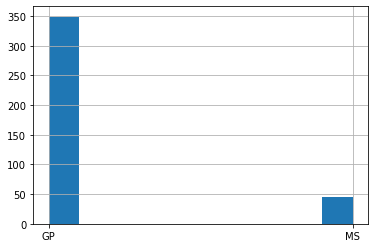

In [1336]:
math.school.hist()
math.school.describe()

In [1337]:
#превалирующее число учеников из школы GP

In [1338]:
#Первичный анализ данных по столбцам
## Столбец sex, столбец без пустых значений
pd.DataFrame(math.sex.value_counts())

,sex
F,208
M,187


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

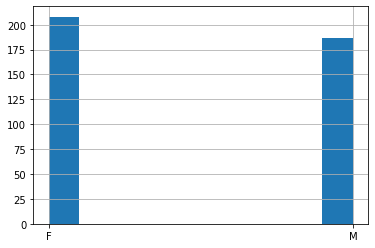

In [1339]:
math.sex.hist()
math.sex.describe()

In [1340]:
#девочек больше, чем мальчиков, но не на много

In [1341]:
#Первичный анализ данных по столбцам
## Столбец age, выше определили, что столбец без пустых значений
pd.DataFrame(math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

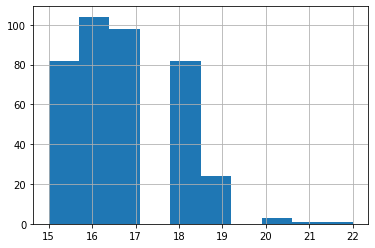

In [1342]:
math.age.hist()
math.age.describe()

In [1343]:
#столбец с возрастом не имеет пустых значений, неравномерное распределение: больше всего учеников возраста 15-17 лет,
# наименьшее количество учеников имеют возраст 20-22 года

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


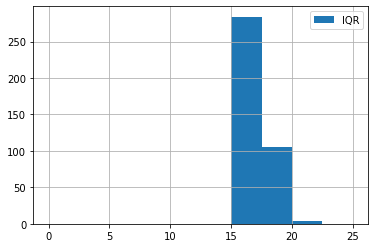

In [1344]:
median_age = math.age.median()
IQR_age = math.age.quantile(0.75) - math.age.quantile(0.25)
perc25_age = math.age.quantile(0.25)
perc75_age = math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25_age), '75-й перцентиль: {},'.format(perc75_age)
      , "IQR: {}, ".format(IQR_age),"Границы выбросов: [{f}, {l}].".format(f=perc25_age - 1.5*IQR_age, l=perc75_age + 1.5*IQR_age))
math.age.loc[math.age.between(perc25_age - 1.5*IQR_age, perc75_age + 1.5*IQR_age)].hist(bins = 10, range = (0, 25), 
                                                                                             label = 'IQR')
plt.legend();

In [1345]:
#Первичный анализ данных по столбцам
## Столбец address, есть пустые значения
math.address = math.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.address.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.address.value_counts()>10).sum())
print("Уникальных значений:", math.address.nunique())
math.loc[:, ['address']].info()

#в датасете больше всего учеников живут в городе

,address
U,295
R,83
nan,17


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1346]:
#заменим пустые значения на наиболее часто встречающиеся - ученик живет в черте города
math.address = math.address.astype(str).apply(lambda x: 'U' if x.strip() == 'nan' else x)
math.address.value_counts()

U    312
R     83
Name: address, dtype: int64

In [1347]:
#Первичный анализ данных по столбцам
## Столбец famsize
math.famsize = math.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.famsize.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.famsize.value_counts()>10).sum())
print("Уникальных значений:", math.famsize.nunique())
math.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107
nan,27


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1348]:
#заменим пустые значения, 27 шт, на наиболее часто встречающиеся - размер семьи больше 3 чел
math.famsize = math.famsize.astype(str).apply(lambda x: 'GT3' if x.strip() == 'nan' else x)
math.famsize.value_counts()

GT3    288
LE3    107
Name: famsize, dtype: int64

In [1349]:
#Первичный анализ данных по столбцам
## Столбец Pstatus
pd.DataFrame(math.Pstatus.value_counts())
math.Pstatus = math.Pstatus.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.Pstatus.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.Pstatus.value_counts()>10).sum())
print("Уникальных значений:", math.Pstatus.nunique())
math.loc[:, ['Pstatus']].info()

,Pstatus
T,314
nan,45
A,36


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1350]:
#заменим пустые значения,45 шт, на наиболее часто встречающиеся - родители живут вместе
math.Pstatus = math.Pstatus.astype(str).apply(lambda x: 'T' if x.strip() == 'nan' else x)
math.Pstatus.value_counts()

T    359
A     36
Name: Pstatus, dtype: int64

In [1351]:
#Первичный анализ данных по столбцам
## Столбец Medu
pd.DataFrame(math.Medu.value_counts())
math.Medu = math.Medu.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.Medu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.Medu.value_counts()>10).sum())
print("Уникальных значений:", math.Medu.nunique())
math.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1352]:
#заменим пустые значения, 3 шт, на наиболее часто встречающиеся - у матери ученика высшее образование
math.Medu = math.Medu.apply(lambda y: '4.0' if y == 'nan' else y)
math.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [1353]:
#Первичный анализ данных по столбцам
## Столбец Fedu
pd.DataFrame(math.Fedu.value_counts())
math.Fedu = math.Fedu.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.Fedu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.Fedu.value_counts()>10).sum())
print("Уникальных значений:", math.Fedu.nunique())
math.loc[:, ['Fedu']].info()


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1354]:
#заменим пустые значения,24 шт, и выброс (значение 40) на наиболее часто встречающиеся - образование отца 5-9 классов
math.Fedu = math.Fedu.apply(lambda y: '2.0' if y == 'nan' or y == '40.0' else y)
math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [1355]:
#Первичный анализ данных по столбцам
## Столбец Mjob
pd.DataFrame(math.Mjob.value_counts())
math.Mjob = math.Mjob.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.Mjob.value_counts()>10).sum())
print("Уникальных значений:", math.Mjob.nunique())
math.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1356]:
#заменим пустые значения, 19 шт, на наиболее часто встречающиеся - работа матери - "другое"
math.Mjob = math.Mjob.apply(lambda y: 'other' if y == 'nan' else y)
math.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [1357]:
#Первичный анализ данных по столбцам
## Столбец Fjob
pd.DataFrame(math.Fjob.value_counts())
math.Fjob = math.Fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.Fjob.value_counts()>10).sum())
print("Уникальных значений:", math.Fjob.nunique())
math.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 6
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1358]:
#заменим пустые значения, 36 шт,  на наиболее часто встречающиеся - работа отца - "другое"
math.Fjob = math.Fjob.apply(lambda y: 'other' if y.strip() == 'nan' else y)
math.Fjob.value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [1359]:
#Первичный анализ данных по столбцам
## Столбец guardian
pd.DataFrame(math.guardian.value_counts())
math.guardian = math.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.guardian.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.guardian.value_counts()>10).sum())
print("Уникальных значений:", math.guardian.nunique())
math.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
nan,31
other,28


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1360]:
#заменим пустые значения на наиболее часто встречающиеся - опекун-мать
math.guardian = math.guardian.apply(lambda y: 'mother' if y.strip() == 'nan' else y)
math.guardian.value_counts()

mother    281
father     86
other      28
Name: guardian, dtype: int64

In [1361]:
#Первичный анализ данных по столбцам
## Столбец traveltime
pd.DataFrame(math.traveltime.value_counts())
math.traveltime = math.traveltime.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.traveltime.value_counts()>10).sum())
print("Уникальных значений:", math.traveltime.nunique())
math.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1362]:
math.traveltime.median()

1.0

In [1363]:
#заменим пустые значения и на наиболее часто встречающиеся - время в пути до школы менее 15 мин
math.traveltime = math.traveltime.apply(lambda y: '1.0' if y == 'nan' else y)
math.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [1364]:
#Первичный анализ данных по столбцам
## Столбец studytime
pd.DataFrame(math.studytime.value_counts())
math.studytime = math.studytime.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.studytime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.studytime.value_counts()>10).sum())
print("Уникальных значений:", math.studytime.nunique())
math.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1365]:
math.studytime.median()

2.0

In [1366]:
#заменим пустые значения на медианное значение - время на учёбу помимо школы в неделю 2-5 часов
math.studytime = math.studytime.apply(lambda y: '2.0' if y == 'nan' else y)
math.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [1367]:
#Первичный анализ данных по столбцам
## Столбец failures
pd.DataFrame(math.failures.value_counts())
math.failures = math.failures.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.failures.value_counts()>10).sum())
print("Уникальных значений:", math.failures.nunique())
math.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1368]:
math.failures.median()

0.0

In [1369]:
#заменим пустые значения на медианное значение количество внеучебных неудач равное 0
math.failures = math.failures.apply(lambda y: '0.0' if y == 'nan' else y)
math.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [1370]:
#Первичный анализ данных по столбцам
## Столбец schoolsup
pd.DataFrame(math.schoolsup.value_counts())
math.schoolsup = math.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.schoolsup.value_counts()>10).sum())
print("Уникальных значений:", math.schoolsup.nunique())
math.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51
nan,9


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1371]:
#заменим пустые значения на медианное значение - дополнительная образовательная поддержка - НЕТ
math.schoolsup = math.schoolsup.astype(str).apply(lambda y: 'no' if y.strip() == 'nan' else y)
math.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [1372]:
#Первичный анализ данных по столбцам
## Столбец famsup
pd.DataFrame(math.famsup.value_counts())
math.famsup = math.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.famsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.famsup.value_counts()>10).sum())
print("Уникальных значений:", math.famsup.nunique())
math.loc[:, ['famsup']].info()

,famsup
yes,219
no,137
nan,39


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1373]:
#заменим пустые значения на медианное значение - семейная образовательная поддержка yes 
math.famsup = math.famsup.astype(str).apply(lambda y: 'yes' if y.strip() == 'nan' else y)
math.famsup.value_counts()

yes    258
no     137
Name: famsup, dtype: int64

In [1374]:
#Первичный анализ данных по столбцам
## Столбец paid
pd.DataFrame(math.paid.value_counts())
math.paid = math.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.paid.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.paid.value_counts()>10).sum())
print("Уникальных значений:", math.paid.nunique())
math.loc[:, ['paid']].info()

,paid
no,200
yes,155
nan,40


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1375]:
#заменим пустые значения на медианное значение - дополнительные платные занятия по математике yes
math.paid = math.paid.astype(str).apply(lambda y: 'yes' if y.strip() == 'nan' else y)
math.paid.value_counts()

no     200
yes    195
Name: paid, dtype: int64

In [1376]:
#Первичный анализ данных по столбцам
## Столбец activities
pd.DataFrame(math.activities.value_counts())
math.activities = math.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.activities.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.activities.value_counts()>10).sum())
print("Уникальных значений:", math.activities.nunique())
math.loc[:, ['activities']].info()

,activities
yes,195
no,186
nan,14


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1377]:
#заменим пустые значения на медианное значение-  дополнительные внеучебные занятия yes
math.activities = math.activities.astype(str).apply(lambda y: 'yes' if y.strip() == 'nan' else y)
math.activities.value_counts()

yes    209
no     186
Name: activities, dtype: int64

In [1378]:
#Первичный анализ данных по столбцам
## Столбец nursery
pd.DataFrame(math.nursery.value_counts())
math.nursery = math.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.nursery.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.nursery.value_counts()>10).sum())
print("Уникальных значений:", math.nursery.nunique())
math.loc[:, ['nursery']].info()

,nursery
yes,300
no,79
nan,16


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1379]:
#заменим пустые значения на медианное значение - посещал детский сад yes
math.nursery = math.nursery.astype(str).apply(lambda y: 'yes' if y.strip() == 'nan' else y)
math.nursery.value_counts()

yes    316
no      79
Name: nursery, dtype: int64

In [1380]:
#Первичный анализ данных по столбцам
## Столбец studytime, granular
pd.DataFrame(math['studytime, granular'].value_counts())
math['studytime, granular'] = math['studytime, granular'].apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math['studytime, granular'].value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math['studytime, granular'].value_counts()>10).sum())
print("Уникальных значений:", math['studytime, granular'].nunique())
math.loc[:, ['studytime, granular']].info()

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1381]:
#Первичный анализ данных по столбцам
## Столбец higher
pd.DataFrame(math.higher.value_counts())
math.higher = math.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.higher.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.higher.value_counts()>10).sum())
print("Уникальных значений:", math.higher.nunique())
math.loc[:, ['higher']].info()

,higher
yes,356
nan,20
no,19


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1382]:
#заменим пустые значения на медианное значение - хочет получить высшее образование yes
math.higher = math.higher.astype(str).apply(lambda y: 'yes' if y.strip() == 'nan' else y)
math.higher.value_counts()

yes    376
no      19
Name: higher, dtype: int64

In [1383]:
#Первичный анализ данных по столбцам
## Столбец internet
pd.DataFrame(math.internet.value_counts())
math.internet = math.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.internet.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.internet.value_counts()>10).sum())
print("Уникальных значений:", math.internet.nunique())
math.loc[:, ['internet']].info()

,internet
yes,305
no,56
nan,34


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1384]:
#заменим пустые значения на медианное значение - наличие интернета дома yes
math.internet = math.internet.astype(str).apply(lambda y: 'yes' if y.strip() == 'nan' else y)
math.internet.value_counts()

yes    339
no      56
Name: internet, dtype: int64

In [1385]:
#Первичный анализ данных по столбцам
## Столбец romantic
pd.DataFrame(math.romantic.value_counts())

math.romantic = math.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.romantic.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.romantic.value_counts()>10).sum())
print("Уникальных значений:", math.romantic.nunique())
math.loc[:, ['romantic']].info()

,romantic
no,240
yes,124
nan,31


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [1386]:
#заменим пустые значения на медианное значение - ученик не состоит в романтических отношениях 
math.romantic = math.romantic.astype(str).apply(lambda y: 'no' if y.strip() == 'nan' else y)
math.romantic.value_counts()

no     271
yes    124
Name: romantic, dtype: int64

In [1387]:
#Первичный анализ данных по столбцам
## Столбец famrel
pd.DataFrame(math.famrel.value_counts())
math.famrel = math.famrel.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.famrel.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.famrel.value_counts()>10).sum())
print("Уникальных значений:", math.famrel.nunique())
math.loc[:, ['famrel']].info()


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1388]:
math.famrel.median()

4.0

In [1389]:
#заменим пустые значения и выброс на медианное значение - хорошие семейные отношения
math.famrel = math.famrel.apply(lambda y: '4.0' if y == 'nan' or y== "-1.0" else y)
math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [1390]:
#Первичный анализ данных по столбцам
## Столбец freetime
pd.DataFrame(math.freetime.value_counts())
math.freetime = math.freetime.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.freetime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.freetime.value_counts()>10).sum())
print("Уникальных значений:", math.freetime.nunique())
math.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1391]:
#заменим пустые значения на медианное значение - свободное время после школы достоточное
math.freetime = math.freetime.apply(lambda y: '3.0' if y == 'nan' else y)
math.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [1392]:
#Первичный анализ данных по столбцам
## Столбец goout
pd.DataFrame(math.goout.value_counts())
math.goout = math.goout.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.goout.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.goout.value_counts()>10).sum())
print("Уникальных значений:", math.goout.nunique())
math.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1393]:
#заменим пустые значения и на медианное значение - достаточное проведение времени с друзьями
math.goout = math.goout.apply(lambda y: '3.0' if y == 'nan' else y)
math.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [1394]:
#Первичный анализ данных по столбцам
## Столбец health
pd.DataFrame(math.health.value_counts())
math.health = math.health.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.health.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.health.value_counts()>10).sum())
print("Уникальных значений:", math.health.nunique())
math.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1395]:
#заменим пустые значения на медианное значение - текущее состояние здоровья - здоровый
math.health = math.health.apply(lambda y: '5.0' if y == 'nan' else y)
math.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [1396]:
#Первичный анализ данных по столбцам
## Столбец absences
pd.DataFrame(math.absences.value_counts())
math.absences = math.absences.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.absences.value_counts()>10).sum())
print("Уникальных значений:", math.absences.nunique())
math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1397]:
math.absences.median()

4.0

In [1398]:
#заменим пустые значения на медианное значение - количество пропущенных занятий - 4
math.absences = math.absences.apply(lambda y: '4.0' if y == 'nan' or y== '385.0' or y == '212.0' else y)
math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [1399]:
#Первичный анализ данных по столбцам
## Столбец score
pd.DataFrame(math.score.value_counts())
math.score = math.score.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.score.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (math.score.value_counts()>10).sum())
print("Уникальных значений:", math.score.nunique())
math.loc[:, ['score']].info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 10 раз: 12
Уникальных значений: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1400]:
math.score.median()

55.0

In [1401]:
#заменим пустые значения на медианное значение 55 баллов по госэкзамену по математике
math.score = math.score.apply(lambda y: '55.0' if y == 'nan' else y)
math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

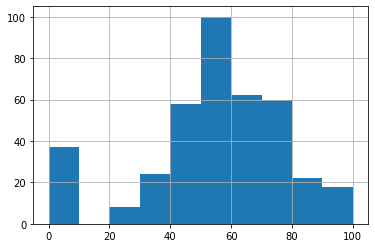

In [1402]:
math.score.hist()
math.score.describe()
#50% учеников имеют балл по математике от 40 до 70, среднее значение 55

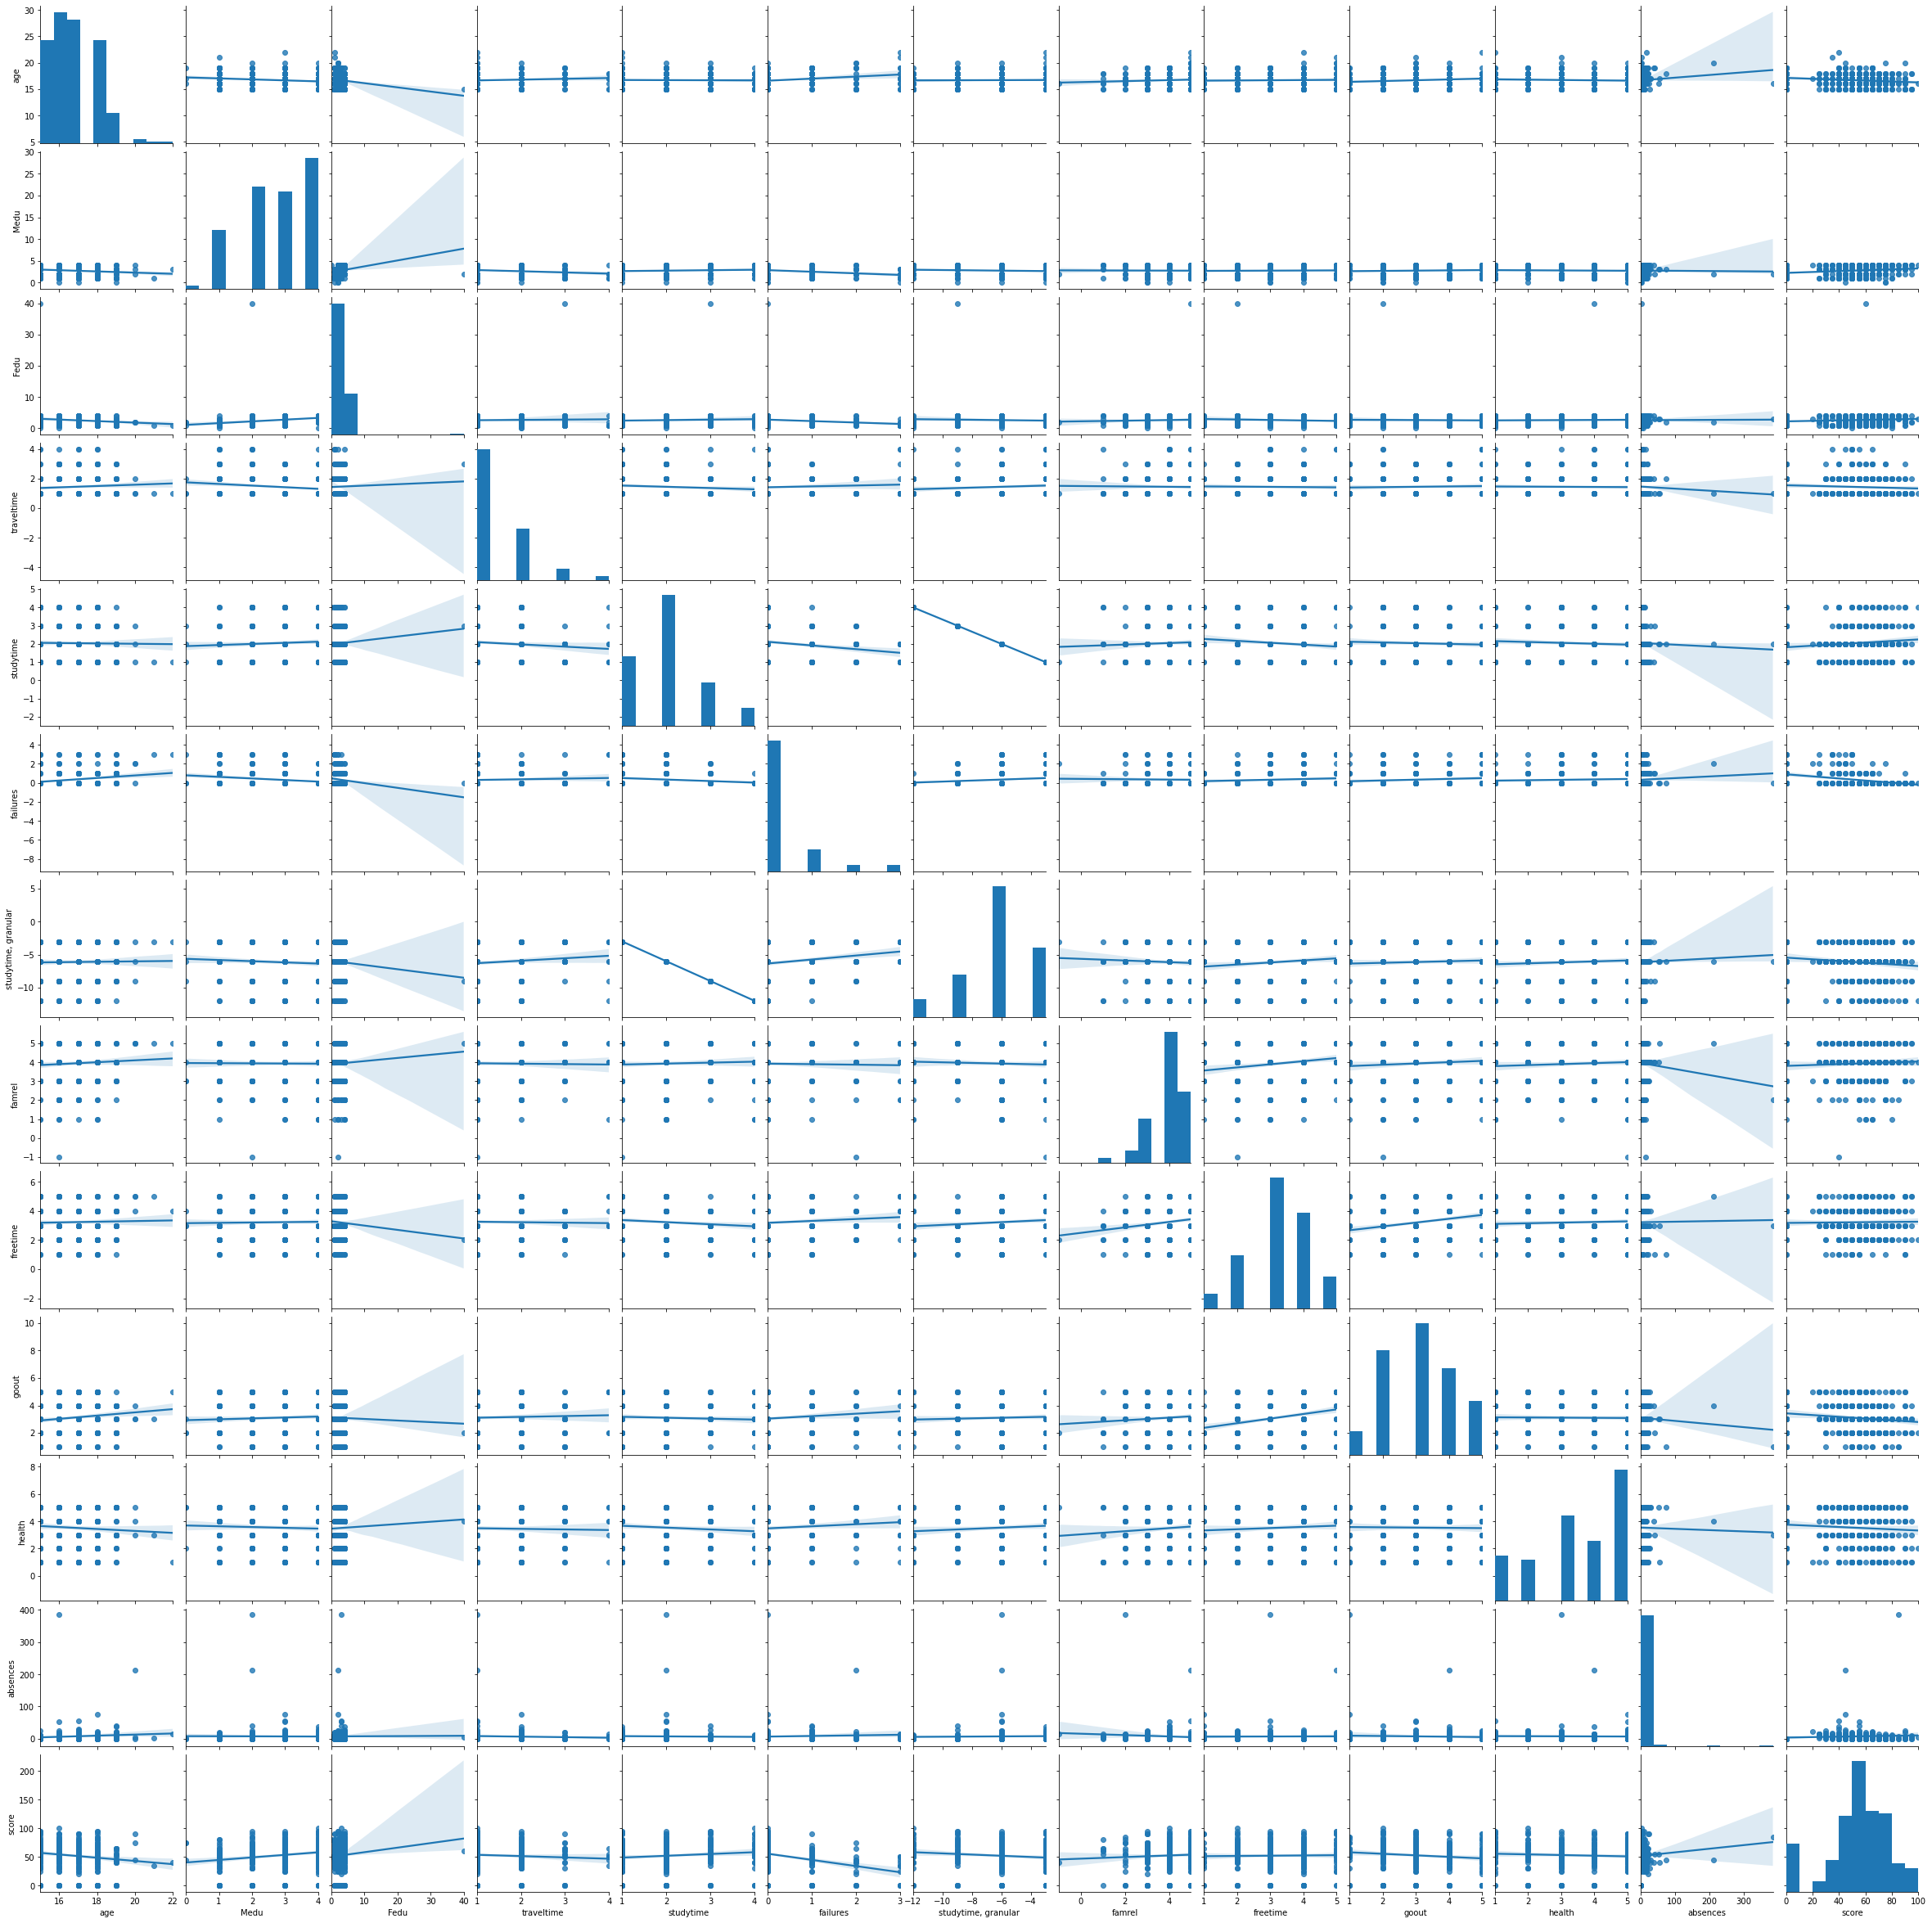

In [1403]:
sns.pairplot(math, kind = 'reg')

In [1404]:
math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [ ]:
#определили коэффициент корреляции между показателями и score:
#прямая зависимость между score и Medu, studytime
#обратная зависимость между score и age, failures (относительно других показателей у показателя failure
#зафиксирован самый высокий показатель корреляции), 'studytime.granular', goout

In [1405]:
#studytime и studytime,granular обратно скоррелированы, то можно удалить один из них
math.drop(['studytime, granular'], inplace = True, axis = 1)
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [1411]:
#Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


In [1412]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [1413]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

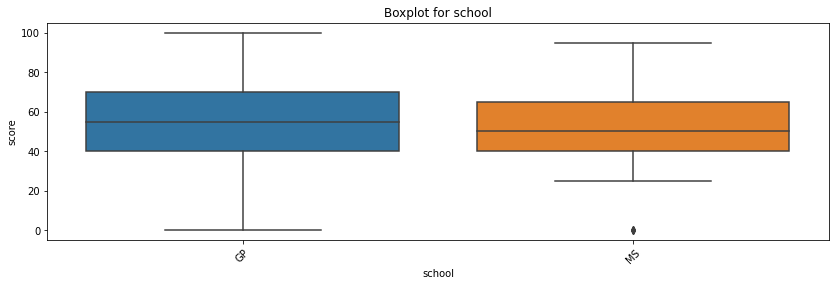

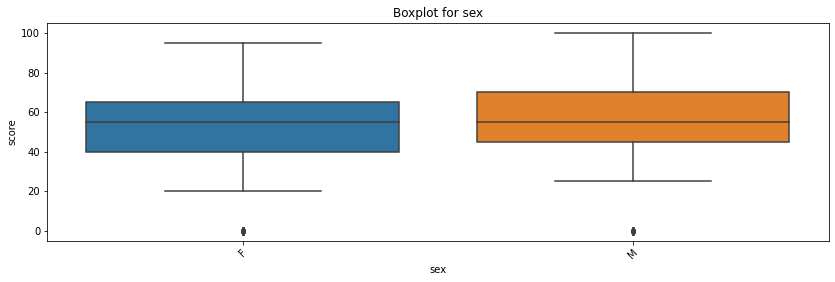

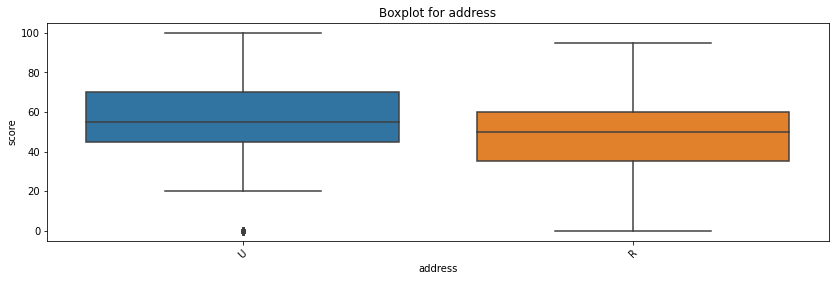

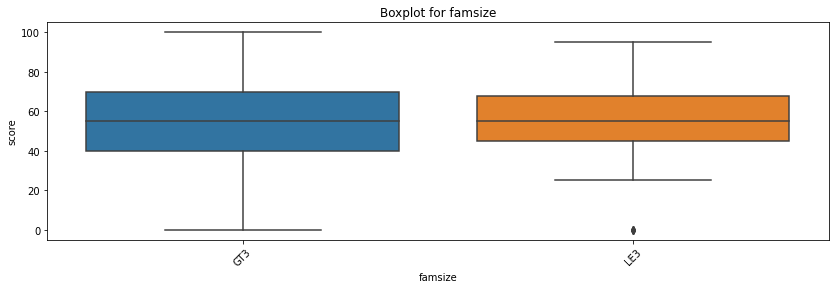

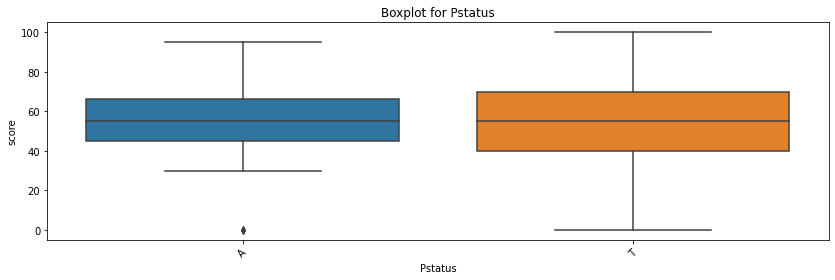

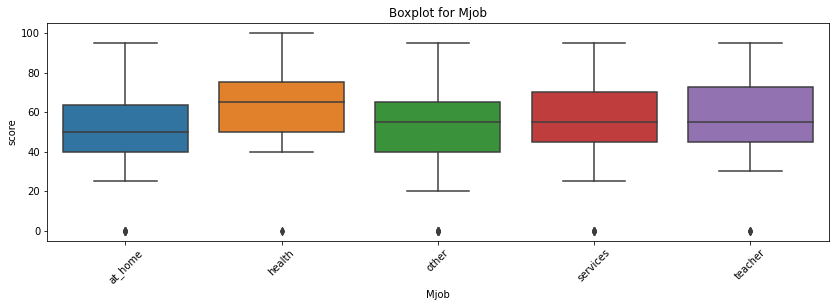

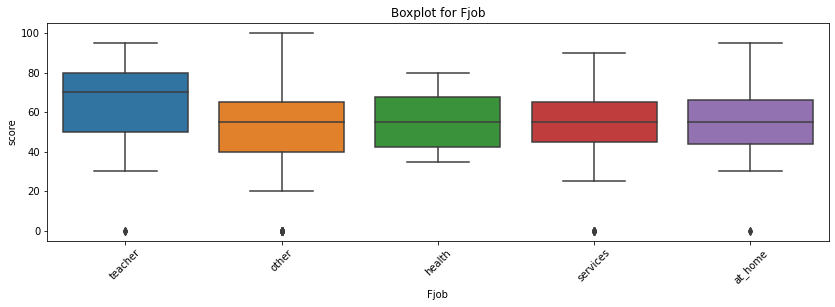

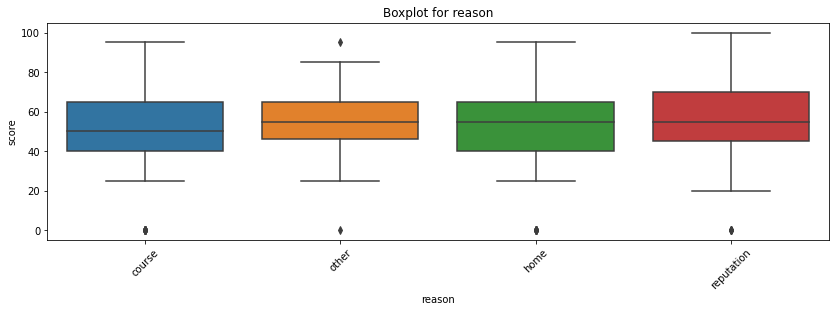

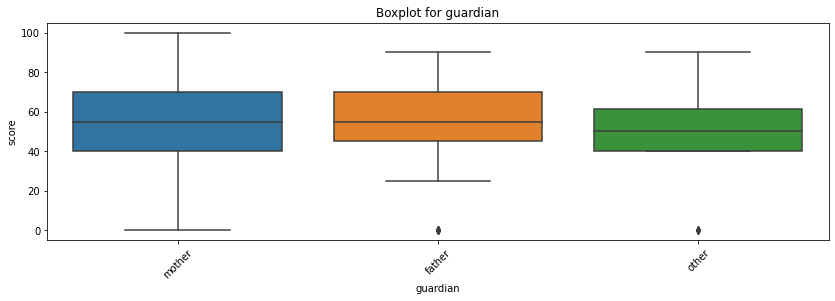

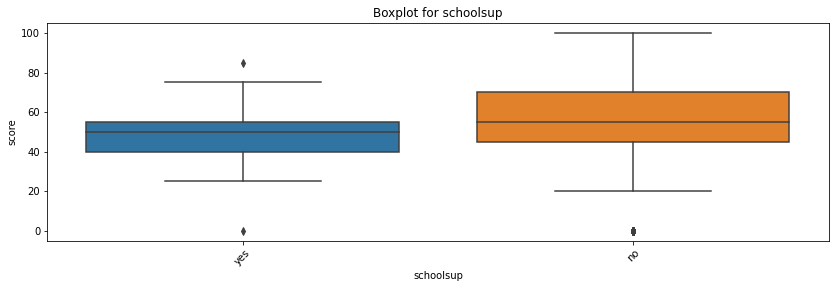

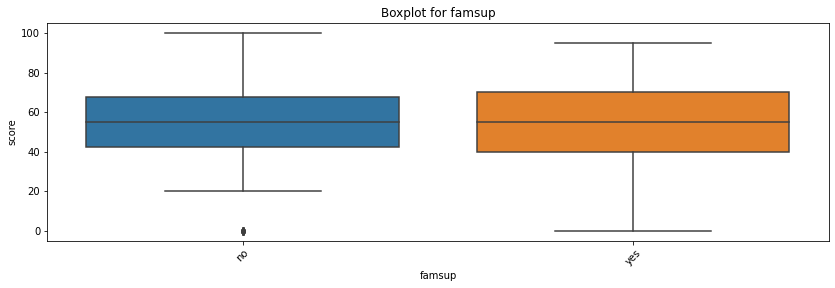

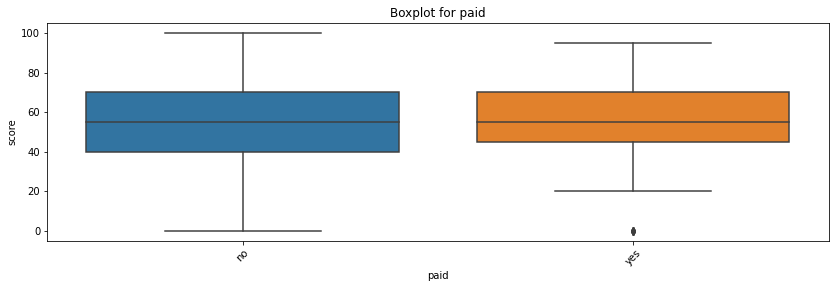

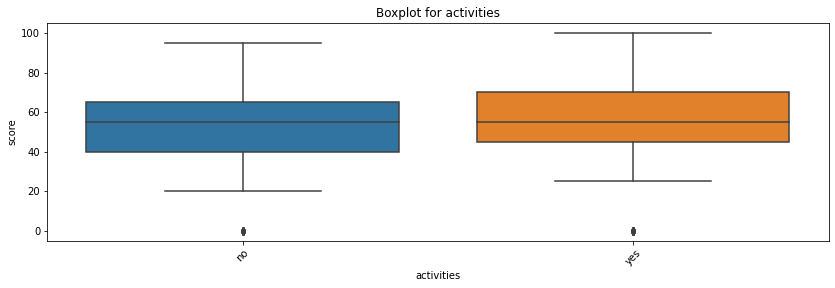

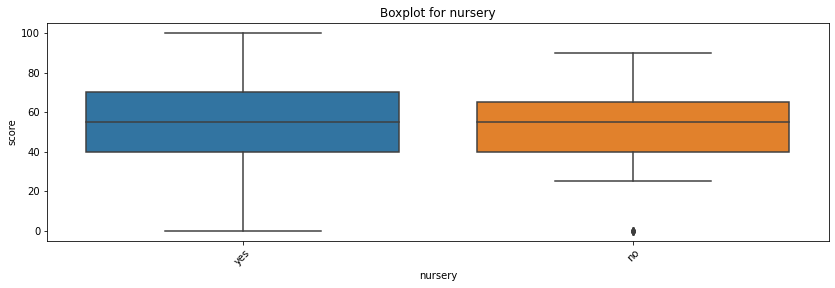

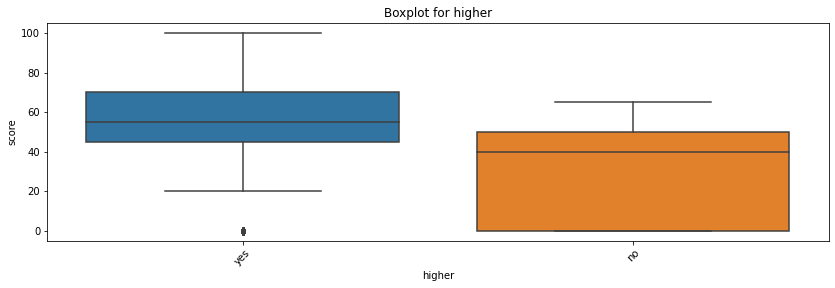

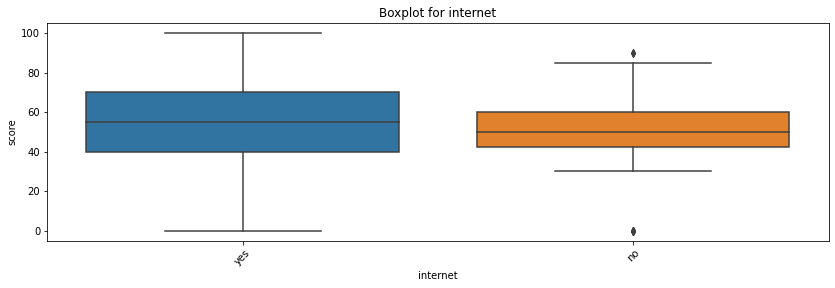

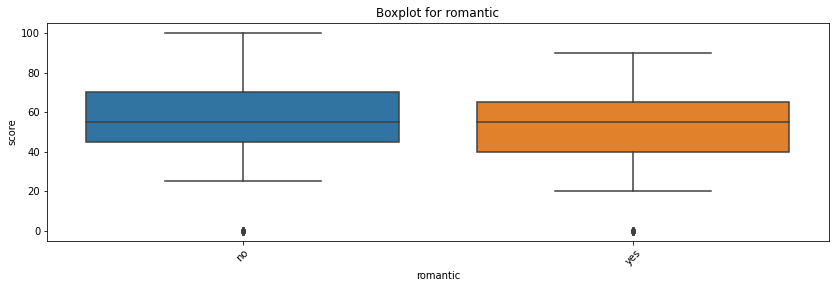

In [1414]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
#Графики Боксплот показывают наличие зависимости показателя score от показателей Mjob(сильная - это увидели и по 
#критерию Стьюдента), Fjob (слабая), higher (слабая)
#Проанализировав Боксплот по Fjob очевидно, что у отцов-учителей ребенок имеет относительно высокую оценку по 
#математике, чем у у отцов других профессий
#Также график показывает наличие зависимости желания получить высшее образование и оценки по математике

In [1415]:
math_for_model = math.loc[:, ['Mjob', 'age', 'goout', 'failures', 'studytime', 'higher', 'Fjob', 'Medu']]
math_for_model

,Mjob,age,goout,failures,studytime,higher,Fjob,Medu
0,at_home,18,4.0,0.0,2.0,yes,teacher,4.0
1,at_home,17,3.0,0.0,2.0,yes,other,1.0
2,at_home,15,2.0,3.0,2.0,yes,other,1.0
3,health,15,2.0,0.0,3.0,yes,other,4.0
4,other,16,2.0,0.0,2.0,yes,other,3.0
...,...,...,...,...,...,...,...,...
390,services,20,4.0,2.0,2.0,yes,services,2.0
391,services,17,5.0,0.0,1.0,yes,services,3.0
392,other,21,3.0,3.0,1.0,yes,other,1.0
393,services,18,1.0,0.0,1.0,yes,other,3.0
